In [37]:
# set up
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [38]:
# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# decode the reviews back to English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_reviews = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])

# encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorize the samples
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [61]:
# define the model
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [62]:
# create a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [63]:
# train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7097 - loss: 0.5574 - val_accuracy: 0.8640 - val_loss: 0.3280
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8864 - loss: 0.2800 - val_accuracy: 0.8870 - val_loss: 0.2585
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9210 - loss: 0.2093 - val_accuracy: 0.8910 - val_loss: 0.2757
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9335 - loss: 0.1781 - val_accuracy: 0.8850 - val_loss: 0.2709
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9425 - loss: 0.1538 - val_accuracy: 0.8820 - val_loss: 0.3115
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9523 - loss: 0.1313 - val_accuracy: 0.8780 - val_loss: 0.2992
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9628 - loss: 0.1051 - val_accuracy: 0.8560 - val_loss: 0.4002
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9681 - loss: 0.0897 - val_accuracy: 0.8760 - val_loss

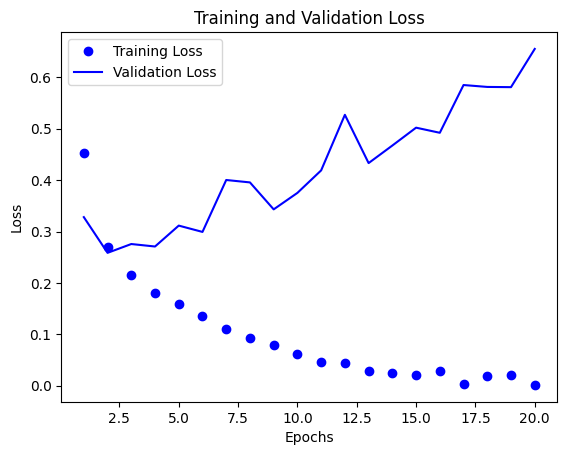

In [64]:
# plot the training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

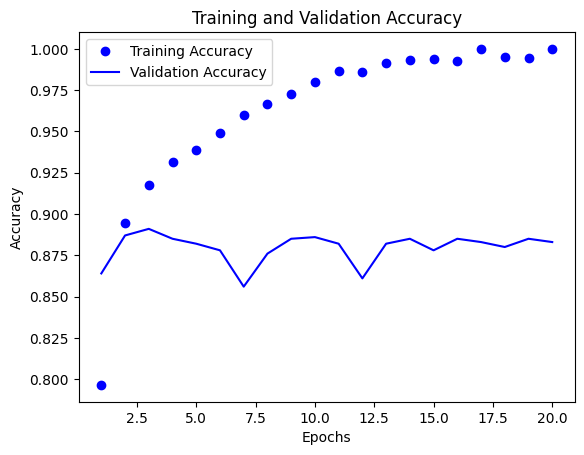

In [65]:
# plot the training and validation accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
# retrain the model
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9874 - loss: 0.0474
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9951 - loss: 0.0163
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0059
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9997 - loss: 0.0024
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9969 - loss: 0.0110
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.7232e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9977 - loss: 0.0077
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.2496e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.6415e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.4895e-04


In [67]:
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.8645 - loss: 0.9115
Loss: 0.905727744102478
Accuracy: 0.8652799725532532
